In [1]:
%pylab inline

import pickle
import gzip
from glob import glob

Populating the interactive namespace from numpy and matplotlib


In [2]:
from itertools import combinations
from collections import Counter
import networkx as nx

# Compare results for the heaps part.

Reload the files for the couple of it and proceed.

Run the

```
mpirun -n 12 -hostfile MPIhostFile python2 05_heapsMeasuresScript.py TWT
```

For each data and then continue here...

In [62]:
#whatToCompare = ["TWT", "URNS_TWT"]
#whatToCompare = ["APS", "URNS_APS"]
#whatToCompare = ["APS", "APS_samples"]
whatToCompare = ["MPC", "URNS_MPC"]

resultsArra = [pickle.load(open("heapsParsSequence_%s.pkl" % selection, "rb"))
              for selection in whatToCompare]


figureNameSuffix = "-".join(whatToCompare)

In [63]:
len(resultsArra[0]["heapsParsPerAgent"]), len(resultsArra[1]["heapsParsPerAgent"])

(66030, 952)

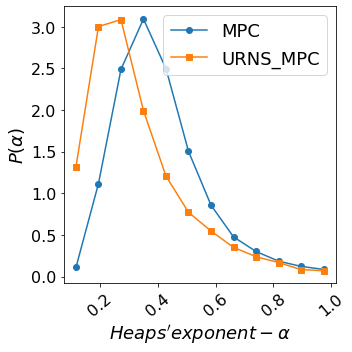

In [69]:
# Average overlap per cumulative weight percentile
fig, ax = plt.subplots(1,1,figsize=(5,5))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    tmp_vals = tmp_res["heapsParsPerAgent"].values()
    tmp_cnst = np.array([v[0][0] for v in tmp_vals])
    tmp_exps = np.array([v[0][1] for v in tmp_vals])
    
    
    f, b = np.histogram(tmp_exps, bins=np.linspace(.0,1.0125,14), density=True)
    b = (b[1:] + b[:-1])/2.
    b = b[f>0]
    f = f[f>0]
    
    ax.plot(b, f, marker=markers[iii%len(markers)],
            c="C%d"%iii, label=tmp_res["name"])
plt.legend(loc="best", fontsize=18)
plt.xticks(size=16, rotation=40)
plt.yticks(size=16)

plt.xlabel(r"$Heaps' exponent - \alpha$", size=18)
plt.ylabel(r"$P(\alpha)$", size=18)
plt.tight_layout()
plt.savefig("heapsExponen_%s.pdf" % figureNameSuffix, bbox_inches="tight")

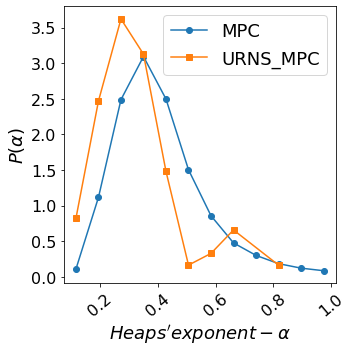

In [59]:
# Average overlap per cumulative weight percentile
fig, ax = plt.subplots(1,1,figsize=(5,5))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    tmp_vals = tmp_res["heapsParsPerAgent"].values()
    tmp_cnst = np.array([v[0][0] for v in tmp_vals])
    tmp_exps = np.array([v[0][1] for v in tmp_vals])
    
    
    f, b = np.histogram(tmp_exps, bins=np.linspace(.0,1.0125,14), density=True)
    b = (b[1:] + b[:-1])/2.
    b = b[f>0]
    f = f[f>0]
    
    ax.plot(b, f, marker=markers[iii%len(markers)],
            c="C%d"%iii, label=tmp_res["name"])
plt.legend(loc="best", fontsize=18)
plt.xticks(size=16, rotation=40)
plt.yticks(size=16)

plt.xlabel(r"$Heaps' exponent - \alpha$", size=18)
plt.ylabel(r"$P(\alpha)$", size=18)
plt.tight_layout()
plt.savefig("heapsExponen_%s.pdf" % figureNameSuffix, bbox_inches="tight")

In [60]:
list(tmp_res["heapsSeqPerAgent"].keys())[0]

1472

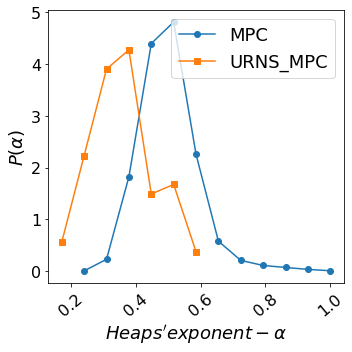

In [61]:
# Compute the exponent as Y[-1]/X[-1]
fig, ax = plt.subplots(1,1,figsize=(5,5))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    
    tmp_vals = tmp_res["heapsSeqPerAgent"]
    
    tmp_exps = []
    for agent, curve in tmp_vals.items():
        tmp_exps.append(np.log(max(curve))/np.log(len(curve)))
    tmp_exps = np.array(tmp_exps)
    
    f, b = np.histogram(tmp_exps, bins=np.linspace(.0,2.,30), density=True)
    b = (b[1:] + b[:-1])/2.
    b = b[f>0]
    f = f[f>0]
    
    ax.plot(b, f, marker=markers[iii%len(markers)],
            c="C%d"%iii, label=tmp_res["name"])
plt.legend(loc="best", fontsize=18)
plt.xticks(size=16, rotation=40)
plt.yticks(size=16)

plt.xlabel(r"$Heaps' exponent - \alpha$", size=18)
plt.ylabel(r"$P(\alpha)$", size=18)
plt.tight_layout()
plt.savefig("heapsExponentStrictFit_%s.pdf" % figureNameSuffix, bbox_inches="tight")

Text(0, 0.5, '$P(\\alpha)$')

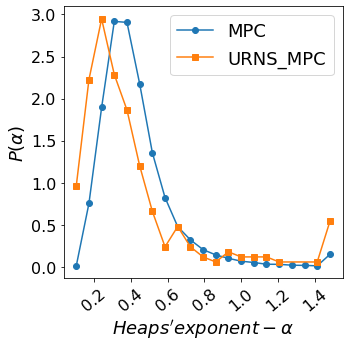

In [19]:
# Average overlap per cumulative weight percentile
fig, ax = plt.subplots(1,1,figsize=(5,5))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    tmp_vals = tmp_res["heapsParsPerAgent"].values()
    tmp_cnst = np.array([v[0][0] for v in tmp_vals])
    tmp_exps = np.array([v[0][1] for v in tmp_vals])
    
    
    f, b = np.histogram(tmp_exps, bins=np.linspace(.0,2.,30), density=True)
    b = (b[1:] + b[:-1])/2.
    b = b[f>0]
    f = f[f>0]
    
    ax.plot(b, f, marker=markers[iii%len(markers)],
            c="C%d"%iii, label=tmp_res["name"])
plt.legend(loc="best", fontsize=18)
plt.xticks(size=16, rotation=40)
plt.yticks(size=16)

plt.xlabel(r"$Heaps' exponent - \alpha$", size=18)
plt.ylabel(r"$P(\alpha)$", size=18)
#plt.tight_layout()
#plt.savefig("heapsExponen_%s.pdf" % figureNameSuffix, bbox_inches="tight")

In [1]:
#tmp_res["heapsParsPerAgent"]

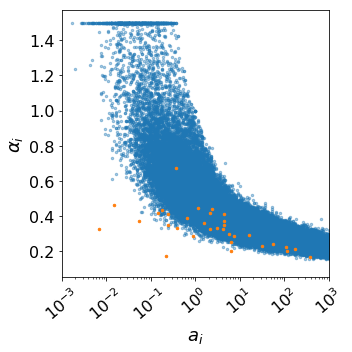

In [38]:
# Average overlap per cumulative weight percentile
fig, ax = plt.subplots(1,1,figsize=(5,5))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    tmp_vals = tmp_res["heapsParsPerAgent"].values()
    tmp_cnst = np.array([v[0][0] for v in tmp_vals])
    tmp_exps = np.array([v[0][1] for v in tmp_vals])
    
    ax.scatter(tmp_cnst, tmp_exps, marker="o", s=6, alpha=min(1,.4))
plt.xscale("log")
#plt.legend(loc="best", fontsize=18)
plt.xticks(size=16, rotation=40)
plt.yticks(size=16)
plt.xlim(1e-3, 1e3)
plt.xlabel(r"$a_i$", size=18)
plt.ylabel(r"$\alpha_i$", size=18)
plt.tight_layout()
plt.savefig("heaps_expVsOffset_%s.pdf" % figureNameSuffix, bbox_inches="tight")
plt.savefig("heaps_expVsOffset_%s.png" % figureNameSuffix, bbox_inches="tight", dpi=300)

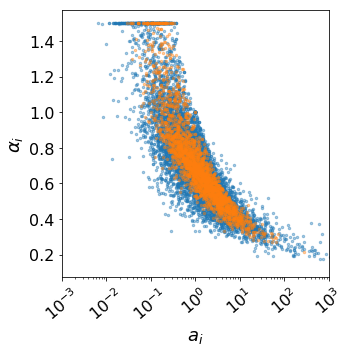

In [33]:
# Average overlap per cumulative weight percentile
fig, ax = plt.subplots(1,1,figsize=(5,5))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    tmp_vals = tmp_res["heapsParsPerAgent"].values()
    tmp_cnst = np.array([v[0][0] for v in tmp_vals])
    tmp_exps = np.array([v[0][1] for v in tmp_vals])
    
    ax.scatter(tmp_cnst, tmp_exps, marker="o", s=6, alpha=min(1,.4))
plt.xscale("log")
#plt.legend(loc="best", fontsize=18)
plt.xticks(size=16, rotation=40)
plt.yticks(size=16)
plt.xlim(1e-3, 1e3)
plt.xlabel(r"$a_i$", size=18)
plt.ylabel(r"$\alpha_i$", size=18)
plt.tight_layout()
plt.savefig("heaps_expVsOffset_%s.pdf" % figureNameSuffix, bbox_inches="tight")
plt.savefig("heaps_expVsOffset_%s.png" % figureNameSuffix, bbox_inches="tight", dpi=300)

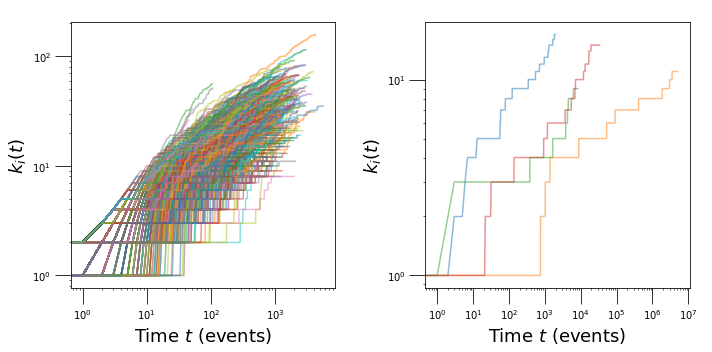

In [18]:
# Plot some trajectories...
plotEvery = (50, 10)

fig, axs = plt.subplots(1,2,figsize=(10,5))

markers = "os^<>"
for iii_plot, tmp_res in enumerate(resultsArra):
    ax = axs[iii_plot]
    
    tmp_vals = tmp_res["heapsSeqPerAgent"]
    
    for iii, seq in enumerate(tmp_vals.values()):
        if iii % plotEvery[iii_plot] != 0: continue
        ax.loglog(np.arange(len(seq)), seq, "-", alpha=.5)
    
    #plt.legend(loc="best", fontsize=18)
    ax.xaxis.set_tick_params(size=16)
    ax.yaxis.set_tick_params(size=16)

    ax.set_xlabel(r"Time $t$ (events)", size=18)
    ax.set_ylabel(r"$k_i(t)$", size=18)
plt.tight_layout()
plt.savefig("heapsCurves_%s.pdf" % figureNameSuffix, bbox_inches="tight")

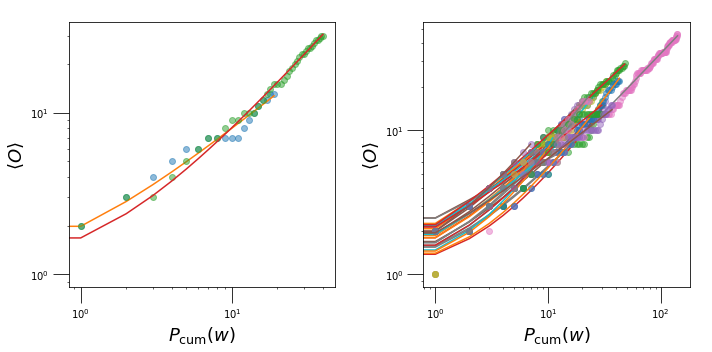

In [11]:
# Plot some trajectories with fit...
plotEvery = (500, 5)

def heaps_fit_foo(x, a, b):
    return a * x**b

def heaps_fit_foo(x, a, b):
    return (1. + x/a)**b

fig, axs = plt.subplots(1,2,figsize=(10,5))

markers = "os^<>"
for iii_plot, tmp_res in enumerate(resultsArra):
    ax = axs[iii_plot]
    
    tmp_vals = tmp_res["heapsSeqPerAgent"]
    
    iii = -1
    for node, seq in tmp_vals.items():
        iii += 1
        if iii % plotEvery[iii_plot] != 0: continue
        XXXs = np.arange(len(seq))
        ax.loglog(XXXs, seq, "o", alpha=.5)
        ax.loglog(XXXs, heaps_fit_foo(XXXs, *tmp_res["heapsParsPerAgent"][node][0]), "-")
    
    #plt.legend(loc="best", fontsize=18)
    ax.xaxis.set_tick_params(size=16)
    ax.yaxis.set_tick_params(size=16)

    ax.set_xlabel(r"$P_{\rm cum}(w)$", size=18)
    ax.set_ylabel(r"$\langle O \rangle$", size=18)
plt.tight_layout()
#plt.savefig("heaps_%s.pdf" % figureNameSuffix, bbox_inches="tight")

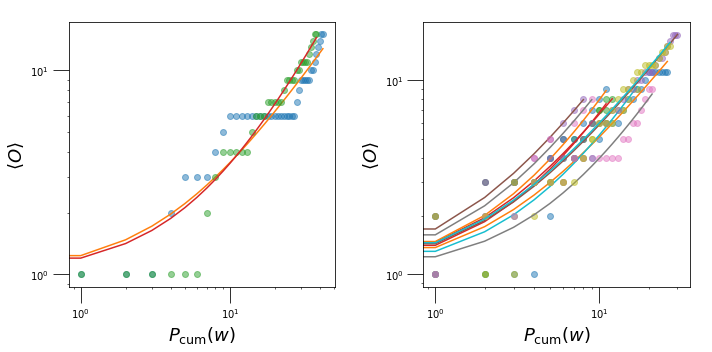

In [12]:
# Plot the problematic ones...
plotEvery = (40, 2)

fig, axs = plt.subplots(1,2,figsize=(10,5))

markers = "os^<>"
for iii_plot, tmp_res in enumerate(resultsArra):
    ax = axs[iii_plot]
    
    tmp_vals = tmp_res["heapsSeqPerAgent"]
    
    iii = -1
    for node, seq in tmp_vals.items():
        tmp_pars = tmp_res["heapsParsPerAgent"][node][0]
        if tmp_pars[1] <= 1.1: continue
        iii += 1
        if iii % plotEvery[iii_plot] != 0: continue
        
        XXXs = np.arange(len(seq))
        ax.loglog(XXXs, seq, "o", alpha=.5)
        ax.loglog(XXXs, heaps_fit_foo(XXXs, *tmp_pars), "-")
    
    #plt.legend(loc="best", fontsize=18)
    ax.xaxis.set_tick_params(size=16)
    ax.yaxis.set_tick_params(size=16)

    ax.set_xlabel(r"$P_{\rm cum}(w)$", size=18)
    ax.set_ylabel(r"$\langle O \rangle$", size=18)
plt.tight_layout()
#plt.savefig("heaps_%s.pdf" % figureNameSuffix, bbox_inches="tight")

## Compare all the dataset in one single plot?

In [20]:
whatToCompare = [["TWT", "URNS_TWT"], ["APS", "URNS_APS"], ["MPC", "URNS_MPC"]]

resultsArra = {selection: pickle.load(open("heapsParsSequence_%s.pkl" % selection, "rb"))
              for what in whatToCompare for selection in what}


figureNameSuffix = "-ALL"

In [32]:
def plotDist(ax, empirical, synthetic, color=0, label="***", maxval=1., nbins=15):
    # Average overlap per cumulative weight percentile

    markers = "o<^s>"
    for iii, tmp_res in enumerate([empirical, synthetic]):
        tmp_vals = tmp_res["heapsParsPerAgent"].values()
        tmp_cnst = np.array([v[0][0] for v in tmp_vals])
        tmp_exps = np.array([0] + [v[0][1] for v in tmp_vals if v[0][1] <=maxval])
        

        f, b = np.histogram(tmp_exps, bins=np.linspace(.0,maxval,nbins), density=True)
        b = (b[1:] + b[:-1])/2.
        b = b[f>0]
        f = f[f>0]
        # marker = markers[color%len(markers)]
        ax.plot(b, f,
                marker=markers[color%len(markers)] if iii==0 else "", linestyle="-" if iii==1 else "",
                ms=10, c="w" if iii==0 else "C%d" % color, label=label if iii==0 else "",
                lw=2.5, mec="C%d" % color, mew=2.5)
                #marker=markers[color%len(markers)] if iii==0 else "", linestyle="-" if iii==1 else "",
                #ms=10, c="C%d" % color, label=label if iii==0 else "", lw=2.5, mec="k", mew=1.5)

    plt.legend(loc="best", fontsize=18)
    plt.xticks(size=16, rotation=40)
    plt.yticks(size=16)
    plt.xticks(size=16, rotation=40)
    plt.yticks(size=16)

    plt.xlabel(r"$Heaps' exponent - \alpha$", size=18)
    plt.ylabel(r"$P(\alpha)$", size=18)

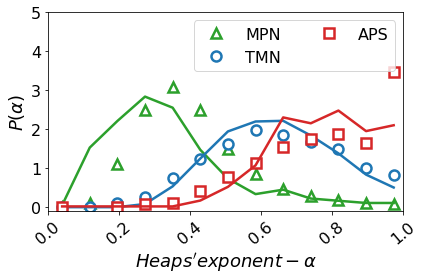

In [40]:
fig, ax = plt.subplots(1,1, figsize=(6,4))

plotDist(ax, resultsArra["MPC"], resultsArra["URNS_MPC"], color=2, label="MPN",maxval=1.0125,nbins=14)
plotDist(ax, resultsArra["TWT"], resultsArra["URNS_TWT"], color=0, label="TMN",maxval=1.0125,nbins=14)
plotDist(ax, resultsArra["APS"], resultsArra["URNS_APS"], color=3, label="APS",maxval=1.0125,nbins=14)

plt.legend(fontsize=16, loc="best", ncol=2)#, bbox_to_anchor=[-.05, 1.25])

plt.ylim(-.1, 5)
plt.xlim(0,1.)
plt.tight_layout()
plt.savefig("heapsExponen_%s_zoom.pdf" % figureNameSuffix, bbox_inches="tight")